In [141]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [142]:
df = pd.read_csv('./LLCP2023_clean.csv', keep_default_na=False, dtype='category')

In [143]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [144]:
X = df.drop(columns=['_MENT14D'])
y = df['_MENT14D']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [146]:
model = RandomForestClassifier(
  n_estimators=100,
    max_depth=None,
    max_features='sqrt',
    class_weight=None,
    random_state=123
)

In [147]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model

In [150]:
def evaluate_model(model, X_test, y_test):

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovo')

    print("\nModel results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    print("\nDetailed classification report:")
    print(classification_report(y_test, y_pred))

    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }




In [151]:
trained_model = train_model(model, X_train, X_test, y_train, y_test)

In [152]:
metrics = evaluate_model(trained_model, X_test, y_test)


Model results:
Accuracy: 0.6945
F1 Score (weighted): 0.6907
ROC AUC Score: 0.8551

Detailed classification report:
              precision    recall  f1-score   support

           0       0.66      0.51      0.58      3509
           1       0.70      0.73      0.71      7338
           2       0.70      0.78      0.74      4995

    accuracy                           0.69     15842
   macro avg       0.69      0.67      0.68     15842
weighted avg       0.69      0.69      0.69     15842



In [153]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

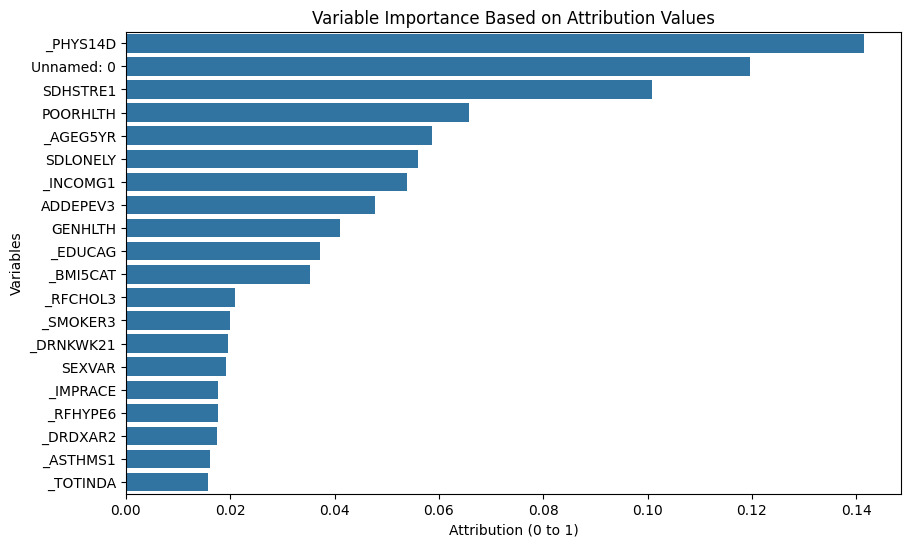

In [158]:

plt.figure(figsize=(10, 6))
sns.barplot(
    x='importance',
    y='feature',
    data=importance_df.head(20)
)

plt.title("Variable Importance Based on Attribution Values")
plt.xlabel("Attribution (0 to 1)")
plt.ylabel("Variables")

plt.show()